<a href="https://colab.research.google.com/github/Alainm74/DataAnalystPortafolio/blob/main/GLM_%2B_Time_Series_Analysis_R_Alain_Monroy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistics for Data Analytics


##Author

Ruben Alain Monroy Perez Negron






## Abstract

The current analysis involves applying statistical techniques and machine learning models to analyze different aspects of a dataset related to billionaires listed in Forbes and conducting time series analysis on the stock prices of NVIDIA Corporation. The analysis includes data pre-processing, GLM modeling and time series forecasting.

For the first part, the analysis focuses on predicting whether an individual is self-made using a logistic regression model. The dataset undergoes thorough pre-processing, including handling missing values through imputation techniques. The GLM model is trained using 80% of the data, and significant variables are identified through hypothesis testing. The model's performance is evaluated, and feature selection methods, such as stepAIC and manual selection, are employed to enhance model accuracy. The optimal predictive model is determined, and the confusion matrix provides insights into the correctness of predictions.

In the final part, time series analysis is performed on NVIDIA Corporation's stock prices. The dataset is pre-processed, and stationarity is checked in both mean and variance. ACF and PACF plots help identify the orders of autoregressive (AR) and moving average (MA) components. The auto.arima function is utilized to determine the best ARIMA model. A 10-step ahead forecast is generated, and the results are plotted alongside the original time series.

This comprehensive project showcases a combination of statistical methods, machine learning models, and time series analysis, providing a holistic approach to data analysis and forecasting.

##Data

Subset Data to Billionaires listed in Forbes
source:
- https://www.kaggle.com/datasets/princeiornongu/subset-data-to-billionaires-listed-in-forbes

file (forbes_2640_billionaires.csv) could be found:

- https://drive.google.com/file/d/1tzp8HXikQYOElNqF-26pRPM-38oJGDVh/view?usp=sharing

##Section 1 - Generalized Linear Models

####Data pre-processing

In [ ]:
#Read the data
data=read.csv('/content/forbes_2640_billionaires.csv');

print(colnames(data))

 [1] "rank"               "name"               "forbes_id"         
 [4] "net_worth"          "age"                "age_range"         
 [7] "country"            "source"             "industry"          
[10] "Age"                "Source.of.Wealth"   "Self.Made.Score"   
[13] "Philanthropy.Score" "Residence"          "Citizenship"       
[16] "Marital.Status"     "Children"           "Education"         
[19] "Bachelor"           "Master"             "Doctorate"         
[22] "Drop.Out"           "Self.Made"         


In [ ]:
#Data frame to work without null values
df=data[,c('Self.Made','industry',	'Age',	'Philanthropy.Score', 'Citizenship', 'Bachelor', 'Master', 'Doctorate', 'Drop.Out')]
unique(df$Self.Made)
df=na.omit(df)
nrow(df)


[1] 0 1

[1] 384

In [ ]:
#Data frame to work with all the rows
df=data[,c('Self.Made','industry',	'Age',	'Philanthropy.Score', 'Citizenship', 'Bachelor', 'Master', 'Doctorate', 'Drop.Out')]
unique(df$Self.Made)
#df=na.omit(df)
nrow(df)

[1] 0 1

[1] 2640

####Treatment for null values
At first instance tried to drop those columns with incomplete values (null values), however, that would delete more than 85% of the rows. Thus, missing value imputation techniques are considered, as the data set contains cathegorical values, the "mode" is used.

Source:

* https://stackoverflow.com/questions/51379042/r-data-table-impute-missing-values-for-multiple-set-of-columns


In [ ]:
# Define a function to calculate the mode
Mode = function(x) {
  ux = unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

In [ ]:
# Data frame to work with data
df = data[, c('Self.Made', 'industry', 'Age', 'Philanthropy.Score', 'Citizenship', 'Bachelor', 'Master', 'Doctorate', 'Drop.Out')]
unique(df$Self.Made)


[1] 0 1

In [ ]:
# Replace null values with 0 for specific columns
cols_to_replace_zero = c('Bachelor', 'Master', 'Doctorate', 'Drop.Out')
df[cols_to_replace_zero][is.na(df[cols_to_replace_zero])] = 0

head(df)

,Self.Made,industry,Age,Philanthropy.Score,Citizenship,Bachelor,Master,Doctorate,Drop.Out
,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Fashion & Retail,74,NA,France,1,0,0,0
2,1,Automotive,52,1,United States,1,0,0,0
3,1,Technology,59,2,United States,1,0,0,0
4,1,Technology,79,1,United States,0,0,0,1
5,1,Finance & Investments,92,5,United States,1,1,0,0
6,1,Technology,67,5,United States,0,0,0,1


In [ ]:
# Impute missing values with the mean for 'Philanthropy.Score' and 'age'
mean_philanthropy_score = mean(df$Philanthropy.Score, na.rm = TRUE)
df$Philanthropy.Score[is.na(df$Philanthropy.Score)] = round(mean_philanthropy_score,0)

mean_age = mean(df$Age, na.rm = TRUE)
df$Age[is.na(df$Age)] = round(mean_age,0)


In [ ]:
# Impute missing values with the mode for the rest of the columns
for (col in names(df)) {
  if (col %in% c(cols_to_replace_zero, 'Philanthropy.Score')) {
    next  # Skip columns already replaced with 0
  }
  df[[col]][is.na(df[[col]])] <- Mode(df[[col]])
}

# Count remaining rows
remaining_rows <- nrow(df)
print(remaining_rows)
head(df)
tail(df)

[1] 2640


,Self.Made,industry,Age,Philanthropy.Score,Citizenship,Bachelor,Master,Doctorate,Drop.Out
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,5,74,2,24,1,0,0,0
2,1,1,52,1,75,1,0,0,0
3,1,17,59,2,75,1,0,0,0
4,1,17,79,1,75,0,0,0,1
5,1,6,92,5,75,1,1,0,0
6,1,17,67,5,75,0,0,0,1


,Self.Made,industry,Age,Philanthropy.Score,Citizenship,Bachelor,Master,Doctorate,Drop.Out
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2635,1,9,64,2,15,0,0,0,0
2636,1,9,51,2,15,0,0,0,0
2637,0,7,80,2,75,0,0,0,1
2638,1,11,60,2,15,0,0,0,0
2639,1,14,72,2,15,1,0,0,0
2640,0,3,66,2,54,0,0,0,0


In [ ]:
#Columns datatype
str(df)

'data.frame':	2640 obs. of  9 variables:
 $ Self.Made         : int  0 1 1 1 1 1 1 1 0 1 ...
 $ industry          : num  5 1 17 17 6 17 12 18 3 17 ...
 $ Age               : num  74 52 59 79 92 67 81 83 66 67 ...
 $ Philanthropy.Score: num  2 1 2 1 5 5 4 2 2 2 ...
 $ Citizenship       : num  24 75 75 75 75 75 75 43 32 75 ...
 $ Bachelor          : num  1 1 1 0 1 0 1 1 1 1 ...
 $ Master            : num  0 0 0 0 1 0 1 0 0 0 ...
 $ Doctorate         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Drop.Out          : num  0 0 0 1 0 1 0 0 1 1 ...


In [ ]:
unique(df$Citizenship)

[1] 24 75 43 32 64 15 13 26 36 29  6 37 67  5 33 59 14 74 35 11 18 60 66 70 47
[26] 49 17 42 73 62 48 54 44  9 63 68 50 20 19 34 22 16 55 72 27 71  1  3 25 56
[51] 38  2 76 77 23 10 39 51 31 28 40 12 58 78 57 46 61 45 30 69 53  8 41 21 65
[76]  4  7 52

In [ ]:
# Label encoding
# Numeric encoding for 'industry' and 'Citizenship'
df$industry <- as.numeric(factor(df$industry))
df$Citizenship <- as.numeric(factor(df$Citizenship))
head(df)
tail(df)

,Self.Made,industry,Age,Philanthropy.Score,Citizenship,Bachelor,Master,Doctorate,Drop.Out
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,5,74,2,24,1,0,0,0
2,1,1,52,1,75,1,0,0,0
3,1,17,59,2,75,1,0,0,0
4,1,17,79,1,75,0,0,0,1
5,1,6,92,5,75,1,1,0,0
6,1,17,67,5,75,0,0,0,1


,Self.Made,industry,Age,Philanthropy.Score,Citizenship,Bachelor,Master,Doctorate,Drop.Out
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2635,1,9,64,2,15,0,0,0,0
2636,1,9,51,2,15,0,0,0,0
2637,0,7,80,2,75,0,0,0,1
2638,1,11,60,2,15,0,0,0,0
2639,1,14,72,2,15,1,0,0,0
2640,0,3,66,2,54,0,0,0,0


###a) Specify the significant variables on the output variable at the level of 𝛼=0.05 and explore the related hypotheses test. Estimate the parameters of your model.

To select the important independent variable, the following hypothesis test is set With α=0.05:

H0: Xj is not an important independent variable

H1: Xj is an important independent variable and is selected


####Model training

In [ ]:
logr=glm(Self.Made~.,family='binomial',data=df);
s=summary(logr)
s


Call:
glm(formula = Self.Made ~ ., family = "binomial", data = df)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.032363   0.325296   0.099  0.92075    
industry            0.092779   0.009715   9.550  < 2e-16 ***
Age                -0.002331   0.003421  -0.681  0.49566    
Philanthropy.Score  0.113309   0.110133   1.029  0.30356    
Citizenship        -0.004878   0.001870  -2.609  0.00909 ** 
Bachelor           -0.108786   0.098800  -1.101  0.27086    
Master              0.531891   0.118971   4.471 7.79e-06 ***
Doctorate           0.249705   0.327305   0.763  0.44552    
Drop.Out            0.916225   0.300137   3.053  0.00227 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3284.1  on 2639  degrees of freedom
Residual deviance: 3142.0  on 2631  degrees of freedom
AIC: 3160

Number of Fisher Scoring iterations: 4


In [ ]:
round(coef(logr),3) #part a
pvalues=round(s$coefficients[,4],3); pvalues

(Intercept)           industry                Age Philanthropy.Score 
             0.032              0.093             -0.002              0.113 
       Citizenship           Bachelor             Master          Doctorate 
            -0.005             -0.109              0.532              0.250 
          Drop.Out 
             0.916

(Intercept)           industry                Age Philanthropy.Score 
             0.921              0.000              0.496              0.304 
       Citizenship           Bachelor             Master          Doctorate 
             0.009              0.271              0.000              0.446 
          Drop.Out 
             0.002

Using α = 0.05 and p_value (Pr(>|t|)), the decision rule is written as follows:

If p_value<α then H0 is rejected and the corresponding independent variable is significant.

Thus the significant variables are:
- industry
- Citizenship
- Master
- Drop.Out



###b) Train the model using 80% of this dataset and suggest an appropriate GLM to model ouput to input variables.


Running the model with all the parameters

In [ ]:
#First running one time the model

n = nrow(df)
indx = sample(n, n * 0.8)
trainset = df[indx, ]
testset = df[-indx, ]
logr = glm(Self.Made ~ ., family = 'binomial', data = trainset)
fthat = predict(logr, testset[, -1], type = 'response')
yhat = rep(0, length(fthat))
yhat[fthat > 0.5] = 1
y = testset$Self.Made
cm=table(y,yhat)
cat('Confusion matrix\n')
cm
TN=cm[1,1]; FP=cm[1,2]; FN=cm[2,1]; TP=cm[2,2]
accuracy = (TN + TP) / nrow(testset)
recall = TP / (FN + TP)
precision = TP / (FP + TP)
f1 = 2 * (recall * precision) / (recall + precision)
cat('Accuracy: ',round(accuracy*100,2),'%\n')
cat('Recall: ',round(recall*100,2),'%\n')
cat('Precision: ',round(precision*100,2),'%\n')
cat('F1 score: ',round(f1*100,2),'%\n')

Confusion matrix


   yhat
y     0   1
  0   4 163
  1   5 356

Accuracy:  68.18 %
Recall:  98.61 %
Precision:  68.59 %
F1 score:  80.91 %


Running the model 100 times

In [ ]:
# evaluate the logistic regression in terms of accuracy, recall, precision, f1score
M = rep(0, 4)
mc = 100
for (i in 1:mc) {
  n = nrow(df)
  indx = sample(n, n * 0.8)
  trainset = df[indx, ]
  testset = df[-indx, ]
  logr = glm(Self.Made ~ ., family = 'binomial', data = trainset)
  fthat = predict(logr, testset[, -1], type = 'response')
  yhat = rep(0, length(fthat))
  yhat[fthat > 0.5] = 1
  y = testset$Self.Made
  # data.frame(y, yhat)
  cm=table(y,yhat)
  TN=cm[1,1]; FP=cm[1,2]; FN=cm[2,1]; TP=cm[2,2]
  accuracy = (TN + TP) / nrow(testset)
  recall = TP / (FN + TP)
  precision = TP / (FP + TP)
  f1 = 2 * (recall * precision) / (recall + precision)
  M = M + c(accuracy, recall, precision, f1) / mc
}

cat('\nFinal Result (Averaged over 100 runs)\n')
cat('Accuracy: ', round(M[1] * 100, 2), '%\n')
cat('Recall: ', round(M[2] * 100, 2), '%\n')
cat('Precision: ', round(M[3] * 100, 2), '%\n')
cat('F1 score: ', round(M[4] * 100, 2), '%\n')


Final Result (Averaged over 100 runs)
Accuracy:  68.3 %
Recall:  97.63 %
Precision:  69.07 %
F1 score:  80.87 %


####Running the model with feature selection using stepAIC() function

In [ ]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#running one time the model with selected features

n = nrow(df)
indx = sample(n, n * 0.8)
trainset = df[indx, ]
testset = df[-indx, ]


# Fit the logistic regression model with all variables
full_model = glm(Self.Made ~ ., family = 'binomial', data = trainset)

# Use stepAIC to select only significant parameters
logr_AIC = stepAIC(full_model, direction = 'both', trace = FALSE)

# Make predictions on the test set
fthat = predict(logr_AIC, testset[, -1], type = 'response')
yhat = rep(0, length(fthat))
yhat[fthat > 0.5] = 1
y = testset$Self.Made
cm=table(y,yhat)
cat('Confusion matrix\n')
cm
TN=cm[1,1]; FP=cm[1,2]; FN=cm[2,1]; TP=cm[2,2]
accuracy = (TN + TP) / nrow(testset)
recall = TP / (FN + TP)
precision = TP / (FP + TP)
f1 = 2 * (recall * precision) / (recall + precision)
cat('Accuracy: ',round(accuracy*100,2),'%\n')
cat('Recall: ',round(recall*100,2),'%\n')
cat('Precision: ',round(precision*100,2),'%\n')
cat('F1 score: ',round(f1*100,2),'%\n')

Confusion matrix


   yhat
y     0   1
  0   1 165
  1   0 362

Accuracy:  68.75 %
Recall:  100 %
Precision:  68.69 %
F1 score:  81.44 %


####Running the model with manual feature selection

In [ ]:
# Specify the selected independent columns
selected_cols <- c('Self.Made', 'industry', 'Citizenship', 'Master', 'Drop.Out')

n = nrow(df)
indx = sample(n, n * 0.8)
trainset = df[indx, selected_cols]
testset = df[-indx, selected_cols]

# Fit the logistic regression model with selected variables
logr_selected = glm(Self.Made ~ ., family = 'binomial', data = trainset)

# Make predictions on the test set
fthat = predict(logr_selected, testset[, -1], type = 'response')
yhat = rep(0, length(fthat))
yhat[fthat > 0.5] = 1
y = testset$Self.Made
cm = table(y, yhat)
cat('Confusion matrix\n')
cm
TN = cm[1, 1]; FP = cm[1, 2]; FN = cm[2, 1]; TP = cm[2, 2]
accuracy = (TN + TP) / nrow(testset)
recall = TP / (FN + TP)
precision = TP / (FP + TP)
f1 = 2 * (recall * precision) / (recall + precision)
cat('Accuracy: ', round(accuracy * 100, 2), '%\n')
cat('Recall: ', round(recall * 100, 2), '%\n')
cat('Precision: ', round(precision * 100, 2), '%\n')
cat('F1 score: ', round(f1 * 100, 2), '%\n')

Confusion matrix


   yhat
y     0   1
  0   3 167
  1   4 354

Accuracy:  67.61 %
Recall:  98.88 %
Precision:  67.95 %
F1 score:  80.55 %


###c) Predict the output of the test dataset using the trained model. Provide the functional form of the optimal predictive model.


Considering the models shown in previous section, the last one model with manual feature selection will be used.

In [ ]:
# Specify the selected independent columns
selected_cols <- c('Self.Made', 'industry', 'Citizenship', 'Master', 'Drop.Out')

n = nrow(df)
indx = sample(n, n * 0.8)
trainset = df[indx, selected_cols]
testset = df[-indx, selected_cols]

# Fit the logistic regression model with selected variables
logr_selected = glm(Self.Made ~ ., family = 'binomial', data = trainset)


In [ ]:
# Make predictions on the test set
fthat = predict(logr_selected, testset[, -1], type = 'response')
yhat = rep(0, length(fthat))
yhat[fthat > 0.5] = 1
y = testset$Self.Made

In [ ]:
# Display the functional form of the logistic regression equation
cat('Functional form of the logistic regression model:\n')
cat('logit(P(Self.Made = 1)) = ')
cat(paste(round(coef(logr_selected), 3), '*', names(coef(logr_selected)), collapse = ' + '), '\n\n')


Functional form of the logistic regression model:
logit(P(Self.Made = 1)) = 0.165 * (Intercept) + 0.093 * industry + -0.007 * Citizenship + 0.535 * Master + 0.945 * Drop.Out 



###d) Provide the confusion matrix and obtain the probability of correctness of predictions.

In [ ]:
cm = table(y, yhat)
cat('Confusion matrix\n')
cm
TN = cm[1, 1]; FP = cm[1, 2]; FN = cm[2, 1]; TP = cm[2, 2]
accuracy = (TN + TP) / nrow(testset)
recall = TP / (FN + TP)
precision = TP / (FP + TP)
f1 = 2 * (recall * precision) / (recall + precision)
cat('Accuracy: ', round(accuracy * 100, 2), '%\n')
cat('Recall: ', round(recall * 100, 2), '%\n')
cat('Precision: ', round(precision * 100, 2), '%\n')
cat('F1 score: ', round(f1 * 100, 2), '%\n')

Confusion matrix


   yhat
y     0   1
  0   2 165
  1   8 353

Accuracy:  67.23 %
Recall:  97.78 %
Precision:  68.15 %
F1 score:  80.32 %


##Section 2 - Time Series Analysis

Use the a particular stock market dataset and apply the following steps to accomplish the time series analysis:

The stock to be used is NVIDIA Corporation (NVDA) from Dec 19, 2018 - Dec 19, 2023.
Source:
- https://finance.yahoo.com/quote/NVDA/history?p=NVDA

####Data pre-processing

Installing the required libraries

In [ ]:
install.packages("quantmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




In [ ]:
install.packages("tseries")
install.packages("timeSeries")
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘timeDate’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘urca’, ‘RcppArmadillo’




In [ ]:
install.packages("xts")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(quantmod)
library(tseries)
library(timeSeries)
library(forecast)
library(xts)

Loading required package: timeDate


Attaching package: ‘timeSeries’


The following object is masked from ‘package:zoo’:

    time<-




Pull data from Yahoo finance

In [ ]:
getSymbols('NVDA', from='2022-01-01',to='2023-12-19')
class(NVDA)
NVDA

[1] "NVDA"

[1] "xts" "zoo"

           NVDA.Open NVDA.High NVDA.Low NVDA.Close NVDA.Volume NVDA.Adjusted
2022-01-03    298.15    307.11   297.85     301.21    39154700      300.7951
2022-01-04    302.77    304.68   283.49     292.90    52715400      292.4966
2022-01-05    289.49    294.16   275.33     276.04    49806400      275.6599
2022-01-06    276.40    284.38   270.65     281.78    45418600      281.3919
2022-01-07    281.41    284.22   270.57     272.47    40993900      272.0948
2022-01-10    265.81    274.69   256.44     274.00    59468100      273.6227
2022-01-11    273.23    280.65   268.39     278.17    40408900      277.7869
2022-01-12    280.67    285.95   276.08     279.99    38341300      279.6044
2022-01-13    283.79    284.80   264.98     265.75    54017100      265.3840
2022-01-14    263.00    271.97   262.10     269.42    39583200      269.0490
       ...                                                                  
2023-12-05    454.66    466.00   452.71     465.66    37171800      465.6600

View of the data

In [ ]:
#get the close price of the stock
NVDA_close_price = NVDA[,4]
head(NVDA_close_price)
tail(NVDA_close_price)

           NVDA.Close
2022-01-03     301.21
2022-01-04     292.90
2022-01-05     276.04
2022-01-06     281.78
2022-01-07     272.47
2022-01-10     274.00

           NVDA.Close
2023-12-11     466.27
2023-12-12     476.57
2023-12-13     480.88
2023-12-14     483.50
2023-12-15     488.90
2023-12-18     500.77

###a) Check whether the time series is stationary in mean and variance.

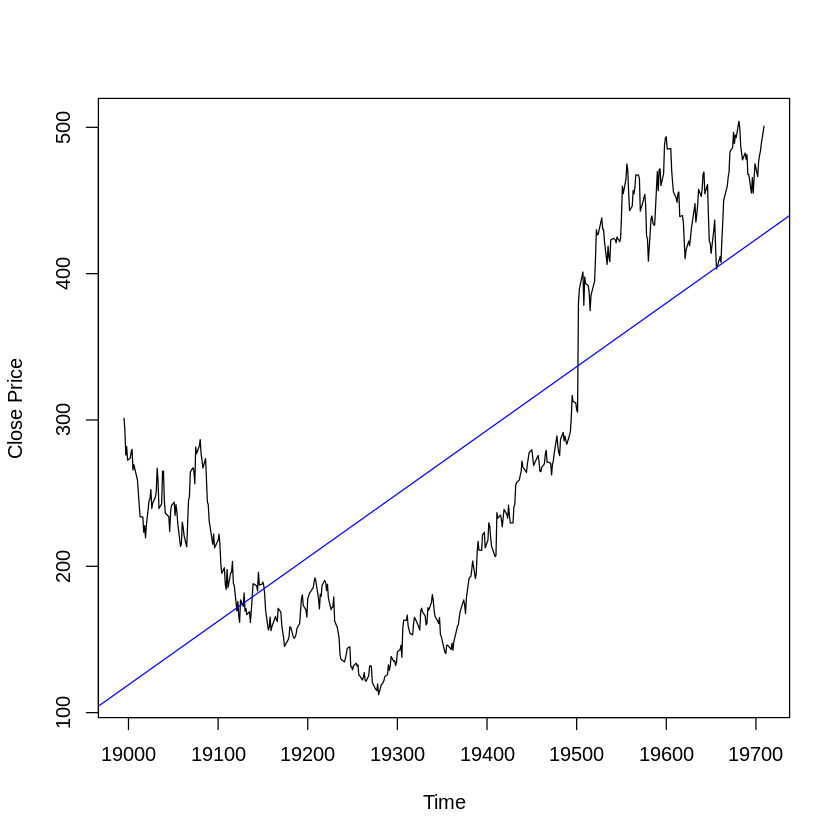

In [ ]:
#Plot NVDA Close Price with treadline

X = NVDA_close_price
time_vector = as.numeric(index(NVDA_close_price)) #time vector

plot(time_vector, NVDA_close_price, type = 'l', col = 'black', xlab = 'Time', ylab = 'Close Price')
abline(lm(NVDA_close_price ~ time_vector), col = 'blue')

At first sight, it is possible to identify non-stationarity in the mean. Thus the diff() function is used.

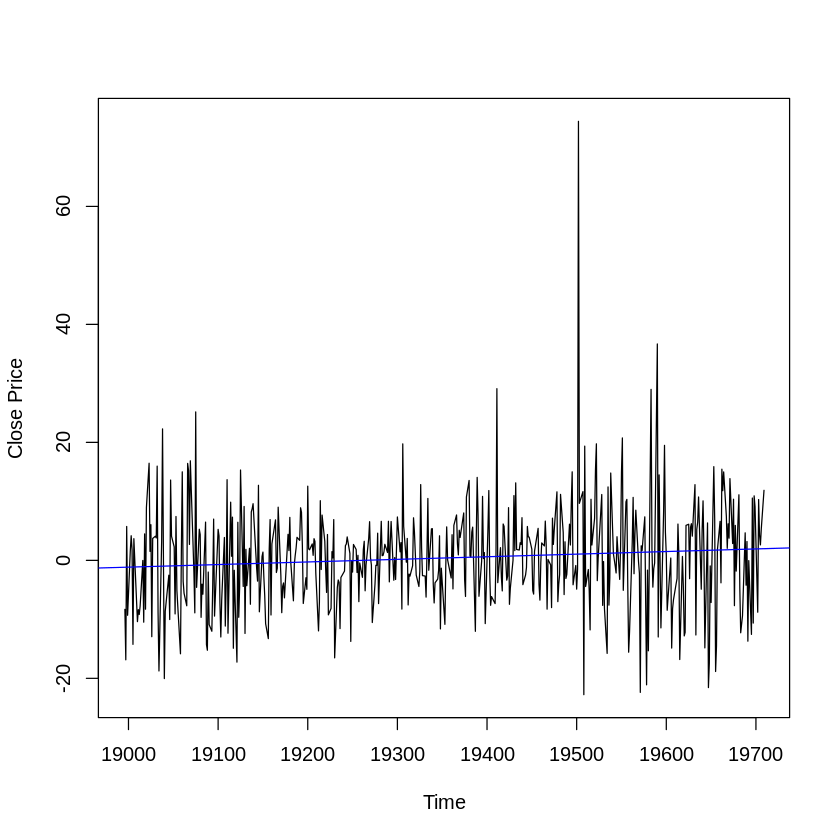

In [ ]:
# make time time series stationary in mean

Y=diff(NVDA_close_price)

time_vector = as.numeric(index(Y)) #time vector

plot(time_vector, Y, type = 'l', col = 'black', xlab = 'Time', ylab = 'Close Price')
abline(lm(Y ~ time_vector), col = 'blue')


Then it is possible to identify non-stationarity in the variancen. Thus the log() function is also used.

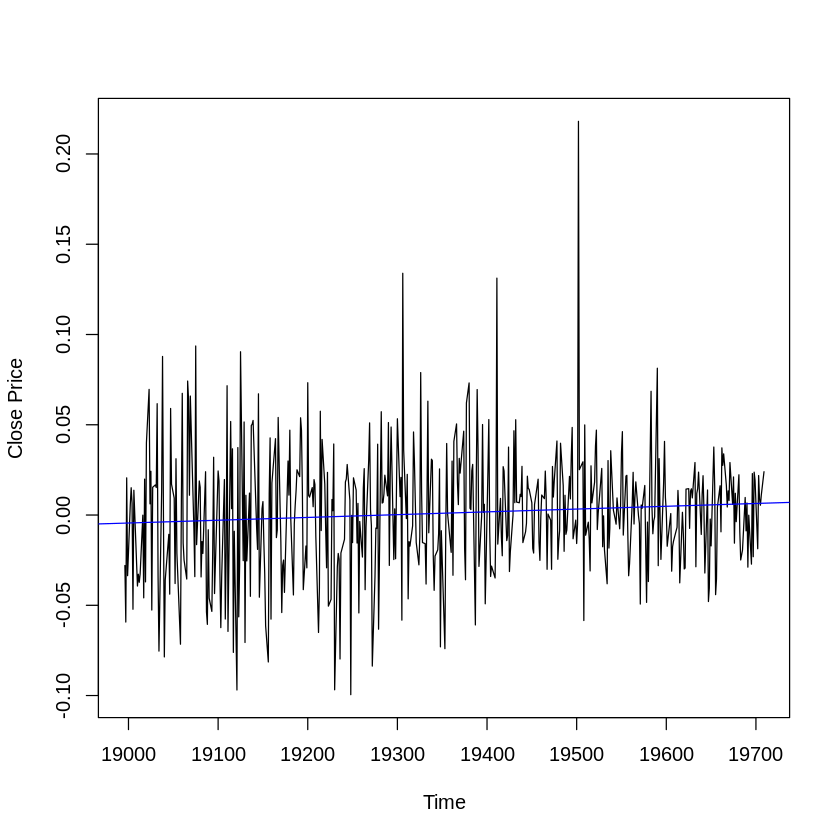

In [ ]:
# make time time series stationary in mean and variance

Y=diff(log(NVDA_close_price))

time_vector = as.numeric(index(Y)) #time vector

plot(time_vector, Y, type = 'l', col = 'black', xlab = 'Time', ylab = 'Close Price')
abline(lm(Y ~ time_vector), col = 'blue')


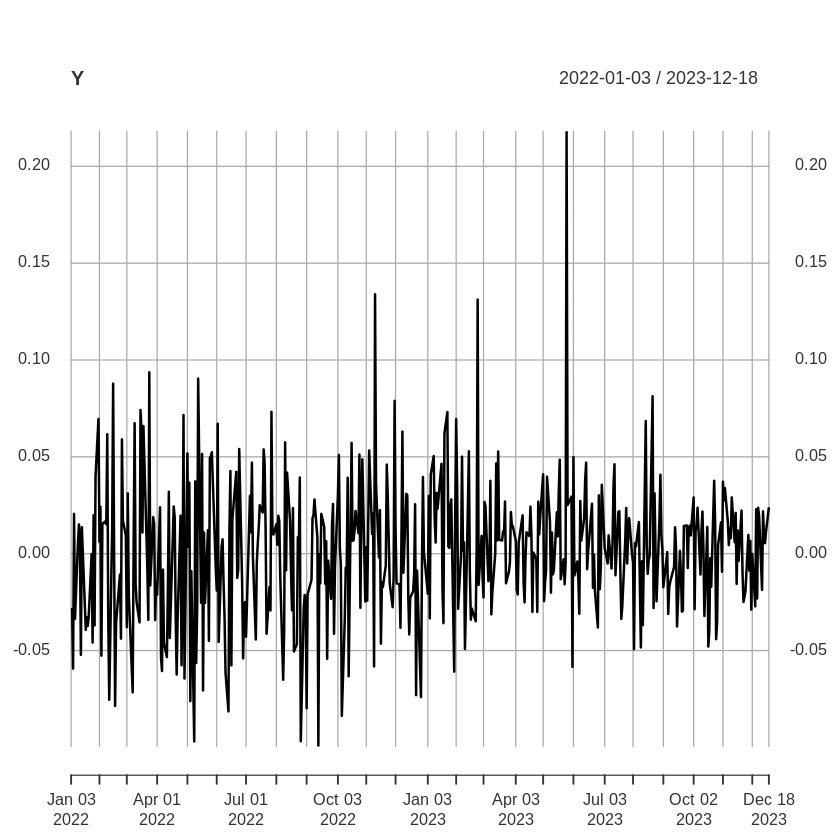

In [ ]:
plot(Y)

###b) Use acf() and pacf() functions to identify the order of AR and MA.

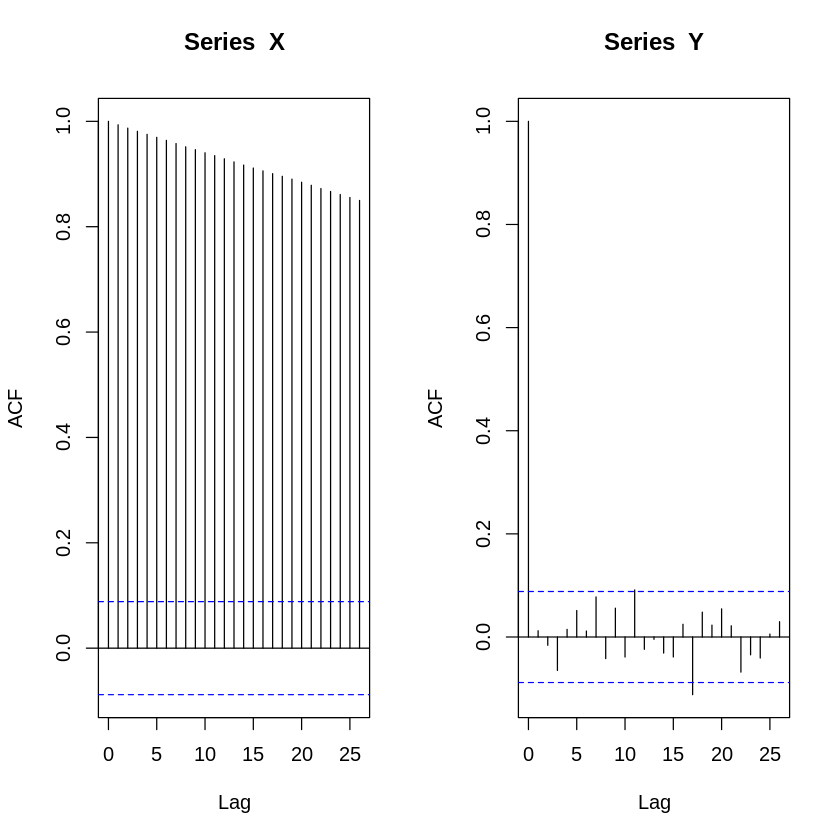

In [ ]:
#pacf on both, non-stationarity and stationarity data
X = NVDA_close_price
Y = diff(log(NVDA_close_price))

par(mfrow=c(1,2))
acf(X)
acf(Y, na.action = na.pass)

Based on the acf plot, the order of MA is q=1 since only two initial lags are outside of the bounds.

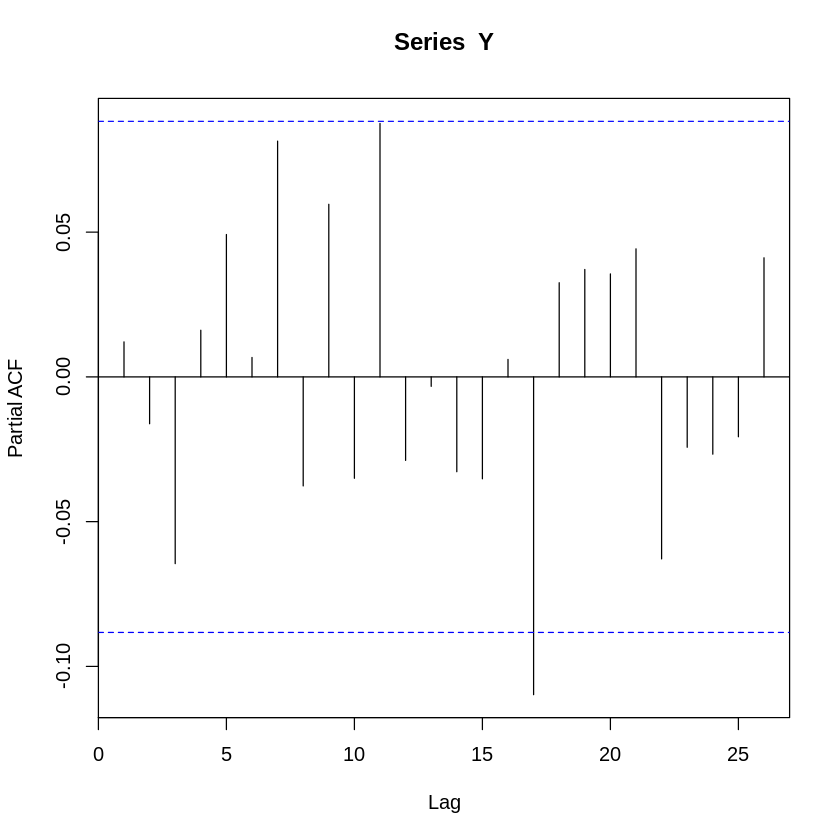

In [ ]:
#pacf on stationarity data
pacf(Y,na.action = na.pass)

Based on the pacf plot, the order of AR is p=0 since there is no initial lag outside of the bounds.

###c) Use auto.arima() to learn the best ARIMA model.

In [ ]:
best=auto.arima(X,seasonal=F)
best

Series: X 
ARIMA(0,2,1) 

Coefficients:
          ma1
      -0.9898
s.e.   0.0067

sigma^2 = 82.57:  log likelihood = -1781.69
AIC=3567.38   AICc=3567.4   BIC=3575.77

In [ ]:
bestT=auto.arima(X,seasonal=T)
bestT

Series: X 
ARIMA(0,2,1) 

Coefficients:
          ma1
      -0.9898
s.e.   0.0067

sigma^2 = 82.57:  log likelihood = -1781.69
AIC=3567.38   AICc=3567.4   BIC=3575.77

The previous comparison showns the same AIC result for the kernel seasonal and non-seasonal in auto.arima(), therefore both models could be used, this could change by considering more data.

###d) Forecast h=10 step ahead prediction of the time series variable and plot it with the original time series.

In [ ]:
fT=forecast(bestT,h=10)


In [ ]:

last_date = time(NVDA_close_price)[length(NVDA_close_price)]
dates_forecasted = seq(last_date + 1, by = frequency(fT), length.out = length(fT$mean))
forecast_df = data.frame(Date = dates_forecasted, Forecast = fT$mean)

# Print the data frame
print(forecast_df)


         Date Forecast
1  2023-12-19 501.8091
2  2023-12-20 502.8482
3  2023-12-21 503.8874
4  2023-12-22 504.9265
5  2023-12-23 505.9656
6  2023-12-24 507.0047
7  2023-12-25 508.0438
8  2023-12-26 509.0830
9  2023-12-27 510.1221
10 2023-12-28 511.1612


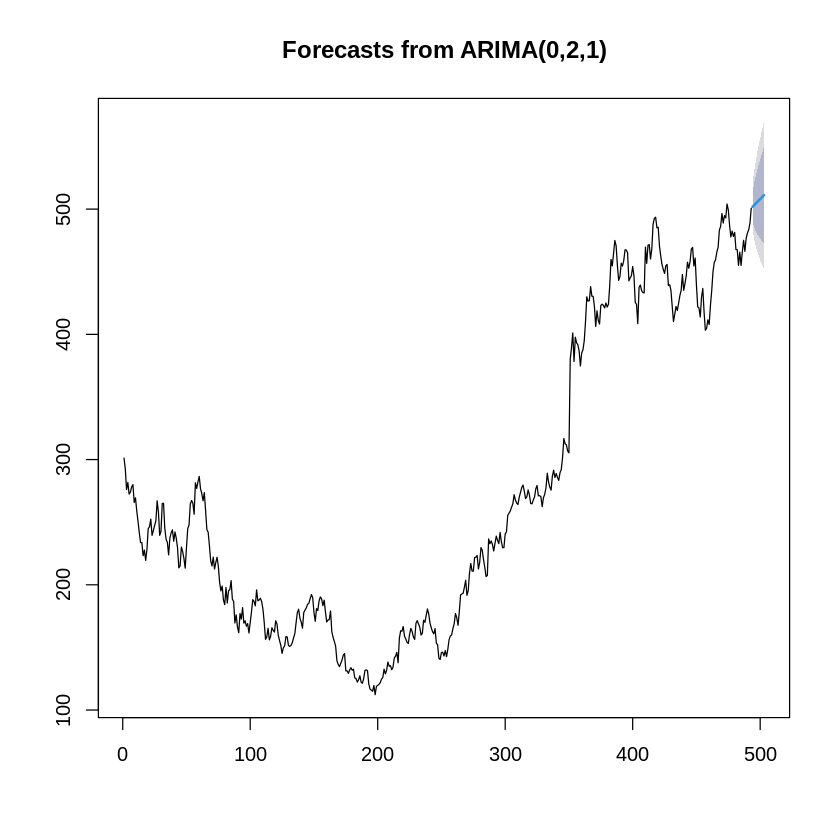

In [ ]:
fT=forecast(bestT,h=10)
f=forecast(best,h=10)

plot(f)

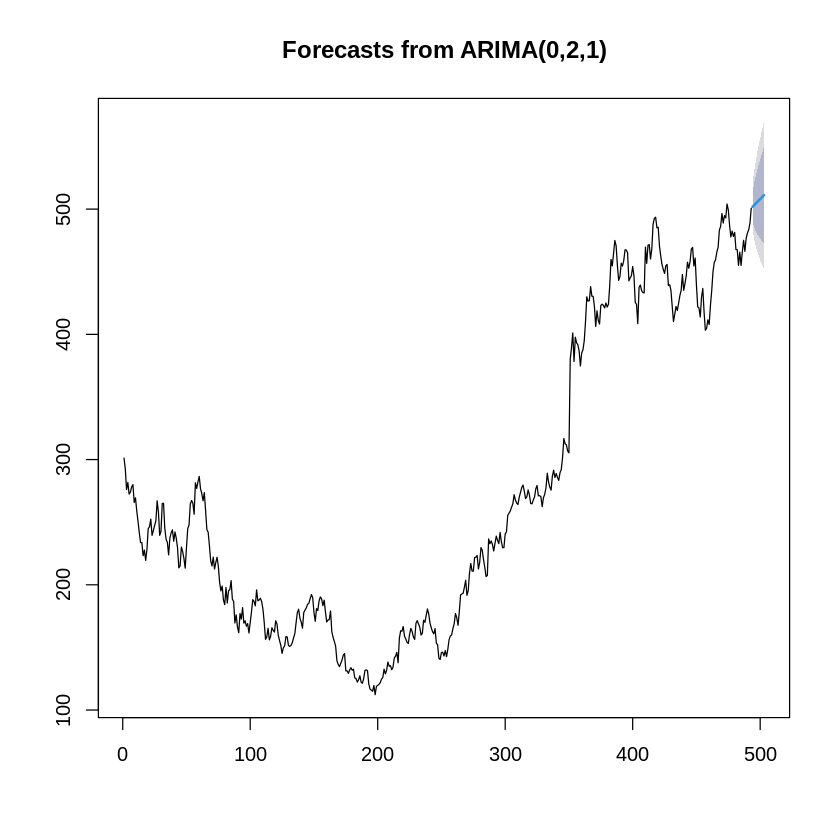

In [ ]:
plot(fT)